# 任务2 基于人脸属性分析算法实现人脸检测

## 职业能力目标

- 了解人脸多属性分析在生活当中的应用场景；
- 掌握利用OpenCV实现图像的采集；
- 掌握调用算法接口，进行人脸多属性分析；
- 理解如何使用多线程的方式实现图像采集和人脸多属性分析。

## 任务描述

本实验将实现用人脸属性分析算法库对采集到的实时画面进行人脸检测并标注人脸框和人脸属性。

## 任务要求

- 使用NlFaceMultiAttr人脸属性算法库实例化人脸属性模型对象；
- 使用NL_EM_ComInit方法初始化模型；
- 使用NL_EM_InitVarIn方法读取图像数据；
- 使用NL_EM_bbox方法输入人脸框的位置坐标；
- 使用NL_EM_Process_C方法检测人脸数量；
- 使用result_show方法把中文显示在图像上；
- 使用NL_EM_Exit方法释放算法内存。

## 任务实施

## 1. 人脸多属性分析实验

### 1.1 人脸多属性分析应用场景

人脸多属性是人脸识别的其中一方面的应用，人脸多属性分析同样应用广泛，比如：

广告投放

通过人脸识别技术对来往观看广告的人员进行人脸检测，然后分析检测出的行人的人脸年龄、性别。

根据人脸检测分析了解相应人群的年龄、性别、颜值等信息，推送相应的广告内容，实现广告的精准投放。

门店用户画像

在商业方面，通过人脸识别技术对对门店中的视频、来往客户等人脸图像进行检测，对门店客流的年龄、性别、颜值等属性进行分析，

帮助商家构建用户画像。商家还可以通过人脸识别检测顾客的面部表情分析对商品的购买情况，实现精准营销。

娱乐互动

在一些娱乐app、H5或者是小程序中，使用到人脸识别技术对用户上次的人脸照片进行检测，分析人物的颜值、年龄、微笑值等属性。

人脸检测与属性分析在娱乐方面的应用可以使有更多的娱乐玩法，提升用户的乐趣。

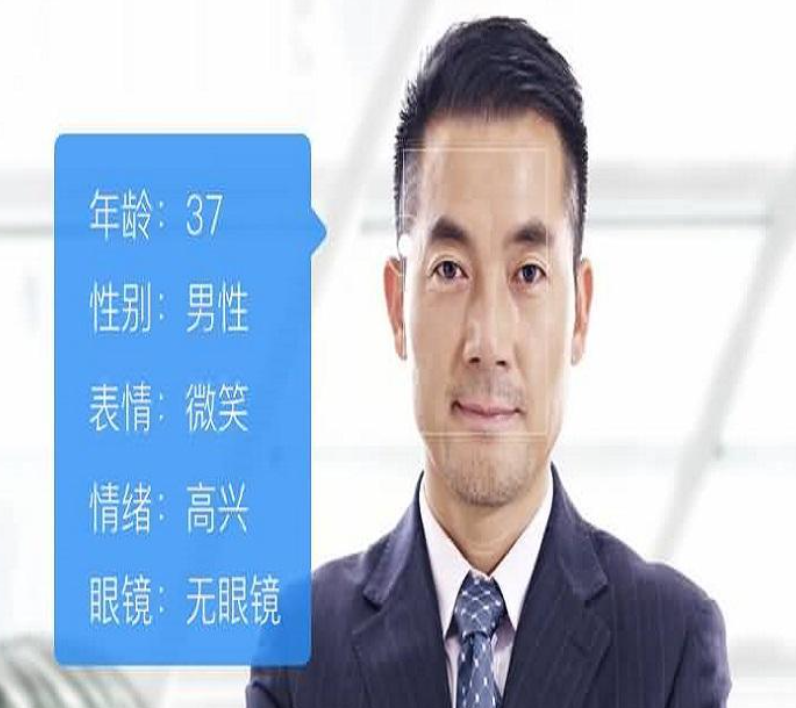

### 1.2 调用人脸多属性分析算法接口

人脸多属性分析是人脸识别的另一种应用场景，所以有依赖于人脸识别接口，来确定人脸的位置信息

人脸多属性分析算法接口的调用，不但要进行识别检测，还要把结果显示在图片上，

比如说把人脸框画在图片上，并把人脸属性，年龄，性别写在图片上等等；

#### 1.2.1 导入人脸识别算法接口库和人脸多属性分析算法接口库

`
NLFaceDetect # 人脸识别库
NlFaceMultiAttr  # 人脸多属性库
`

这两种算法库都是是底层由C写的算法库，集成在核心开发板上，在经过python的对接后，形成了一套python的接口库，可以直接调用


In [ ]:
from lib.faceDetect import NLFaceDetect
from lib.faceAttr import NlFaceMultiAttr
import cv2
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

#### 1.2.2 实例化算法接口对象

`
nlFaceDetect = NLFaceDetect(face_libNamePath)
nlFaceMulti = NlFaceMultiAttr(em_libNamePath)
`

实例化的时候，会自动执行`init()`初始化函数，该函数功能主要是加载算法库，指定函数参数类型和返回值类型，

并初始化结构体变量，libNamePath是固定库文件路径，执行没有报错，表示实例化成功


### <font color=red size=3>动手练习1</font>


仿照实例化人脸识别算法类的方法：
- 在`<1>`处指定人脸多属性库文件路径：路径为`/usr/local/lib/libNLMultiAttrPredEnc.so`

- 在`<2>`处使用`NlFaceMultiAttr`方法实例化人脸多属性算法类，赋值给`nlFaceMulti`

**填写完成后执行代码，输出结果为类似`<lib.faceAttr.NlFaceMultiAttr at 0x7f8a2ae438>`的实例对象，说明填写正确。**

In [ ]:
face_libNamePath = <1>  # 指定人脸识别库文件路径
nlFaceDetect = NLFaceDetect(face_libNamePath)  # 实例化人脸识别算法类
em_libNamePath = "/usr/local/lib/libNLMultiAttrPredEnc.so"  # 指定人脸多属性库文件路径
nlFaceMulti = <2>  # 实例化人脸多属性算法类



<details>
<summary><font color=red size=3>点击查看动手练习1答案</font></summary>
<pre><code>

```python
face_libNamePath = '/usr/local/lib/libNL_faceEnc.so'  # 指定人脸识别库文件路径
nlFaceDetect = NLFaceDetect(face_libNamePath)  # 实例化人脸识别算法类
em_libNamePath = "/usr/local/lib/libNLMultiAttrPredEnc.so"  # 指定人脸多属性库文件路径
nlFaceMulti = NlFaceMultiAttr(em_libNamePath)  # 实例化人脸多属性算法类
```

</code></pre>
</details>

#### 1.2.3 加载模型和配置，并初始化

`
nlFaceDetect.NL_FD_ComInit(configPath) 
nlFaceMulti.NL_EM_ComInit(self.rootPath)
`

将内存分配到各个模块，比如，在人脸识别里面是人脸检测，人脸对齐等等，在人脸多属性里面，是针对人脸多属性模块的分配。 

`configPath`是模型和配置文件路径，执行没有报错，表示加载成功

In [ ]:
configPath = b"/usr/local/lib/rk3399_AI_model"  # 指定模型以及配置文件路径
nlFaceDetect.NL_FD_ComInit(configPath)  # 加载人脸识别模型并初始化
nlFaceMulti.NL_EM_ComInit(configPath)  # 加载人脸多属性分析模型并初始化

#### 1.2.4 加载图片数据

将采集到的图片数据，加载到两个算法中(`image`为图片数据)，返回0表示加载成功

`
nlFaceDetect.NL_FD_InitVarIn(image)
nlFaceMulti.NL_EM_InitVarIn(image)
`

### <font color=red size=3>动手练习2</font>

- 在`<1>`处填写代码，使用`display`函数显示图像盒子

- 在`<2>`处补充代码，使用`cv2.imencode`与`.tobytes()`函数将`image1`图像显示出来。

**填写完成后查看能否正确显示图像，若能够正确显示则说明填写正确。**

##### 1.2.4.1 显示原始的目标图像

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

image = cv2.imread("./exp/face1.jpg")
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
<1>  # 将盒子显示出来
imgbox.value = <2> # 把图像值转成byte类型的值


<details>
<summary><font color=red size=3>点击查看动手练习2答案</font></summary>
<pre><code>

```python
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

image = cv2.imread("./exp/face1.jpg")
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image1)[1].tobytes() # 把图像值转成byte类型的值
```

</code></pre>
</details>

##### 1.2.4.2 加载图片到算法

In [ ]:
ret1 = nlFaceDetect.NL_FD_InitVarIn(image)  # 图像加载到人脸算法中
print(ret1)

#### 1.2.5 调用人脸检测主函数处理图像


`
nlFaceDetect.NL_FD_Process_C()
`

返回人脸个数，并输出人脸框的位置信息，在输出结构体，可以获取相关信息

In [ ]:
ret2 = nlFaceDetect.NL_FD_Process_C()  # 返回值是目标个数
print('人脸个数：', ret2)

#### 1.2.6 取出人脸个数值，赋值给人脸属性分析

`
nlFaceDetect.djEDVarOut.num
`

从人脸检测输出结构体里面，获取人脸个数


In [ ]:
nlFaceMulti.faceNum = nlFaceDetect.djEDVarOut.num
print('人脸个数：', nlFaceMulti.faceNum)
ret3 = nlFaceMulti.NL_EM_InitVarIn(image)  # 图像加载到人脸多属性算法中
print(ret3)

#### 1.2.7 根据人脸个数，把人脸坐标的位置信息，作为人脸多属性的输入

#### （1）取出人脸框位置信息

`(x1,y1)`代表左上角坐标，`（x2,y2）`代表右下角的坐标

`
outObject = nlFaceDetect.djEDVarOut.faceInfos[i].bbox
(outObject.x1, outObject.y1, outObject.x2, outObject.y2)
`

#### （2）作为人脸多属性的输入

把人脸框的位置坐标，传入人脸多属性算法中,该函数调用了`cv2.rectangle()`进行画出人脸框

`
rgb = nlFaceMulti.NL_EM_bbox(fFDCoordinates, image)
`

`cv2.rectangle()`的作用是根据坐标，描绘一个简单的矩形边框

参数依次为：图片，左上角右下角位置坐标，线条颜色，线条粗细

`
cv2.rectangle(image, (int(outObject.x1), int(outObject.y1)),(int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)
`

### <font color=red size=3>动手练习3</font>

仿照在`<1>`处填写代码，将`outObject`中的`x2`,`y2`坐标插入`fFDCoordinates`列表

**填写完成后执行代码，若打印出的列表中有4个坐标值，说明填写正确。**

In [ ]:
fFDCoordinates = []
for i in range(nlFaceDetect.djEDVarOut.num):
    outObject = nlFaceDetect.djEDVarOut.faceInfos[i].bbox
    fFDCoordinates.append(outObject.x1)
    fFDCoordinates.append(outObject.y1)
    <1>
    cv2.rectangle(image, (int(outObject.x1), int(outObject.y1)),(int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)
image = nlFaceMulti.NL_EM_bbox(fFDCoordinates, image)
print(fFDCoordinates)


<details>
<summary><font color=red size=3>点击查看动手练习3答案</font></summary>
<pre><code>

```python
fFDCoordinates = []
for i in range(nlFaceDetect.djEDVarOut.num):
    outObject = nlFaceDetect.djEDVarOut.faceInfos[i].bbox
    fFDCoordinates.append(outObject.x1)
    fFDCoordinates.append(outObject.y1)
    fFDCoordinates.append(outObject.x2)
    fFDCoordinates.append(outObject.y2)
    cv2.rectangle(image, (int(outObject.x1), int(outObject.y1)),(int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)
image = nlFaceMulti.NL_EM_bbox(fFDCoordinates, image)
print(fFDCoordinates)
```

</code></pre>
</details>

#### 1.2.8 调用人脸多属性分析主处理函数

调用主处理函数，分析人脸多属性，包括年龄，性别，有无口罩，是否带眼镜等等，具体看接口信息

如果没有人脸就不执行主处理函数，否则会报错

返回的是能获取到属性的人脸个数信息

`
ret4 = nlFaceMulti.NL_EM_Process_C()
`

In [ ]:
if ret3 == 0:
    ret4 = nlFaceMulti.NL_EM_Process_C()
    print(ret4)  # 返回人脸个数

#### 1.2.9 调用结果函数，输出结果，并描绘在图片上

`
nlFaceMulti.result_show(rgb)
`

该函数里面有调用freetype的中文描绘模块，目的是把中文显示在图片上，opencv是不支持中文显示的


In [ ]:
image = nlFaceMulti.result_show(image)

#### 1.2.10 将经过算法处理的图像显示，并释放内存

利用jupyter的画图库和显示库，来显示获取的图片，并释放内存和模型

### <font color=red size=3>动手练习4</font>

在`<1>`处填写代码，显示识别了人脸属性的图像`image`。

**填写完成后查看图片中是否打印出了人脸属性，若存在说明填写正确。**

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

<1>

nlFaceDetect.NL_FD_Exit() # 释放算法内存和模型
nlFaceMulti.NL_EM_Exit()


<details>
<summary><font color=red size=3>点击查看动手练习4答案</font></summary>
<pre><code>

```python
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像值转成byte类型的值

nlFaceDetect.NL_FD_Exit() # 释放算法内存和模型
nlFaceMulti.NL_EM_Exit()
```

</code></pre>
</details>

### 1.3 利用多线程方式实现视频流的人脸检测

利用多线程，使图像采集和算法识别同时运行，从而实现视频流的人脸检测，并且可以避免一些因花时间太久，导致的视频卡顿

#### 1.3.1  引入相关的库

####  threading线程库

多线程类似于同时执行多个不同程序，多线程运行有如下优点：

- 使用线程可以把占据长时间的程序中的任务放到后台去处理。
- 用户界面可以更加吸引人，比如用户点击了一个按钮去触发某些事件的处理，可以弹出一个进度条来显示处理的进度。
- 程序的运行速度可能加快。
- 在一些等待的任务实现上如用户输入、文件读写和网络收发数据等，线程就比较有用了。在这种情况下我们可以释放一些珍贵的资源如内存占用等等。

每个独立的线程有一个程序运行的入口、顺序执行序列和程序的出口。

但是线程不能够独立执行，必须依存在应用程序中，由应用程序提供多个线程执行控制。

In [ ]:
import time   # 时间库
import cv2      # 引入opencv图像处理库
import threading   # 这是python的标准库，线程库
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
from lib.faceDetect import NLFaceDetect  # 人脸识别算法库接口
from lib.faceAttr import NlFaceMultiAttr # 人脸多属性算法接口

#### 1.3.2 定义摄像头采集线程

结合上面的opencv采集图像的内容，利用多线程的方式串起来，形成一个可传参，可调用的通用类。

这里定义了一个全局变量`camera_img`，用作存储获取的图片数据，以便于其他线程可以调用

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，打开摄像头，并设置分辨

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。在该函数里，实现了循环获取图像的内容

In [ ]:
class CameraThread(threading.Thread):
    def __init__(self, camera_id, camera_width, camera_height):
        threading.Thread.__init__(self)
        self.working = True
        self.cap = cv2.VideoCapture(camera_id)  # 打开摄像头
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, camera_width)  # 设置摄像头分辨率宽度
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, camera_height)  # 设置摄像头分辨率高度
        
    def run(self):
        global camera_img     # 定义一个全局变量，用于存储获取的图片，以便于算法可以直接调用
        camera_img = None
        while self.working:
            ret, image = self.cap.read()  # 获取新的一帧图片
            if ret:
                camera_img = image
            
    def stop(self):
        self.working = False
        self.cap.release()

#### 1.3.3 定义算法识别线程

结合调用算法接口的内容和图像显示内容，利用多线程的方式整合起来，循环识别，

对摄像头采集线程中获取的每一帧图片进行识别，并显示，形成视频流的画面

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，定义了显示内容，并实例化算法和加载模型

- `run`函数

该函数是在实例化后，执行start启动函数的时候，会自动执行。

在该函数是一个循环，实现了对采集的每一帧图片进行算法识别，然后将结果绘画在图片上，并将处理后的图片显示出来

In [ ]:
class FaceAttrThread(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.working = True
        self.running = False
        self.imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
        display(self.imgbox)  # 将盒子显示出来
        configPath = b"/usr/local/lib/rk3399_AI_model"  # 指定模型以及配置文件路径
        face_libNamePath = '/usr/local/lib/libNL_faceEnc.so'  # 指定人脸识别库文件路径
        self.nlFaceDetect = NLFaceDetect(face_libNamePath)  # 实例化人脸识别算法类
        em_libNamePath = "/usr/local/lib/libNLMultiAttrPredEnc.so"  # 指定人脸多属性库文件路径
        self.nlFaceMulti = NlFaceMultiAttr(em_libNamePath)  # 实例化人脸多属性算法类
        self.nlFaceDetect.NL_FD_ComInit(configPath)  # 加载人脸识别模型并初始化
        self.nlFaceMulti.NL_EM_ComInit(configPath)  # 加载人脸多属性分析模型并初始化
        
    def run(self):
        self.running = True
        # 显示图像，把摄像头线程采集到的数据，全局变量camera_img，转换后，装在在盒子里，全局变量是不断更新的
        while self.working:
            try:
                if camera_img is not None:
                    limg = camera_img   # 获取全局变量图像值
                    if self.nlFaceDetect.NL_FD_InitVarIn(limg) == 0: # 将图片作为输入，传入到算法中
                        if self.nlFaceDetect.NL_FD_Process_C() > 0: # 返回值是目标个数
                            # 人脸检测结果输出
                            self.nlFaceMulti.faceNum = self.nlFaceDetect.djEDVarOut.num
                            if self.nlFaceMulti.NL_EM_InitVarIn(limg) == 0:
                                fFDCoordinates = []
                                for i in range(self.nlFaceDetect.djEDVarOut.num):
                                    outObject = self.nlFaceDetect.djEDVarOut.faceInfos[i].bbox
                                    fFDCoordinates.append(outObject.x1)
                                    fFDCoordinates.append(outObject.y1)
                                    fFDCoordinates.append(outObject.x2)
                                    fFDCoordinates.append(outObject.y2)
                                    cv2.rectangle(limg, (int(outObject.x1), int(outObject.y1)),(int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)
                                limg = self.nlFaceMulti.NL_EM_bbox(fFDCoordinates, limg)
                                ret6 = self.nlFaceMulti.NL_EM_Process_C()
                                limg = self.nlFaceMulti.result_show(limg)
                    self.imgbox.value = cv2.imencode('.jpg', limg)[1].tobytes() # 把图像值转成byte类型的值
            except Exception as e:
                # print(e)
                pass
        self.running = False
            
    def stop(self):
        self.working = False
        while self.running:
            pass
        self.nlFaceDetect.NL_FD_Exit()
        self.nlFaceMulti.NL_EM_Exit()

#### 1.3.4 调用两个线程，启动视频流的人脸检测

实例化两个线程，并启动这两个线程，实现完整的人脸检测功能，运行时，加载模型比较久，需要等待几秒

In [ ]:
camera_th = CameraThread(0, 640, 480)
face_attr_th = FaceAttrThread()

camera_th.start()
face_attr_th.start()

#### 1.3.5 停止线程

为了避免占用资源，结束实验时需要停止摄像头采集线程和算法识别线程，或者重启内核

In [ ]:
face_attr_th.stop()
camera_th.stop()

## 任务小结

本次实验的收获：

- 了解了人脸多属性分析在生活当中的应用场景；
- 学会了使用多线程的方式，并调用算法接口实现实时的人脸多属性分析。